# Looking at how adding an extra feature with varying levels of relevance effects the r2_score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [2]:
X, y, coef = make_regression(n_samples=100, 
                             n_features=10, 
                             n_informative=5, 
                             n_targets=1, 
                             bias=0.0, 
                             effective_rank=None, 
                             tail_strength=0.5, 
                             noise=100, 
                             shuffle=True, 
                             coef=True, 
                             random_state=42)

In [3]:
pd.DataFrame(coef, index=[f"feat_{x}" for x in range(0, coef.shape[0])]).T

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9
0,16.748258,0.0,0.0,63.643025,0.0,70.647573,0.0,10.456784,3.158614,0.0


In [4]:
df = (pd.DataFrame(X, columns=[f"feat_{x}" for x in range(0, X.shape[1])])
.merge(pd.DataFrame(y, columns=["target"]),
      left_index=True,
      right_index=True))

In [5]:
df.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,target
0,-0.926930,-1.430141,1.632411,-3.241267,-1.247783,-1.024388,0.130741,-0.059525,-0.252568,-0.440044,-186.494628
1,0.202923,0.334457,0.285865,1.547505,-0.387702,1.795878,2.010205,-1.515744,-0.612789,0.658544,191.976107
2,-0.241236,0.456753,0.342725,-1.251539,1.117296,1.443765,0.447709,0.352055,-0.082151,0.569767,315.503594
3,0.289775,-1.008086,-2.038125,0.871125,-0.408075,-0.326024,-0.351513,2.075401,1.201214,-1.870792,100.185659
4,-0.007973,-0.190339,-1.037246,0.077368,0.538910,-0.861284,-1.382800,1.479944,1.523124,-0.875618,-40.813080


## It is interesting to see how choosing a feature with a high coefficient vs one with a coefficient of 0 effects the outcome

In [6]:
edit_feature = "feat_1"

In [7]:
new_feat_df = df[[edit_feature]]

In [8]:
## Create 

In [9]:
np.random.seed(42)
for i in np.arange(0.1, 100, 0.1):
    new_feat_df[f"extra_feat_{round(i, 2)}"] = new_feat_df[[edit_feature]].add(np.random.normal(0,i,100).reshape(-1, 1))

<ipython-input-9-15ece02a7e91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_feat_df[f"extra_feat_{round(i, 2)}"] = new_feat_df[[edit_feature]].add(np.random.normal(0,i,100).reshape(-1, 1))


In [10]:
new_feat_df.head()

,feat_1,extra_feat_0.1,extra_feat_0.2,extra_feat_0.3,extra_feat_0.4,extra_feat_0.5,extra_feat_0.6,extra_feat_0.7,extra_feat_0.8,extra_feat_0.9,...,extra_feat_99.0,extra_feat_99.1,extra_feat_99.2,extra_feat_99.3,extra_feat_99.4,extra_feat_99.5,extra_feat_99.6,extra_feat_99.7,extra_feat_99.8,extra_feat_99.9
0,-1.430141,-1.380470,-1.713216,-1.322805,-1.761739,-2.227355,-0.874435,-0.900249,-1.848320,-0.585686,...,-16.410693,132.958593,-59.340571,116.009787,124.543760,10.551120,152.564366,-61.512927,-140.535863,8.614412
1,0.334457,0.320630,0.250328,0.502692,0.110384,0.034769,1.480107,-0.311059,1.173664,-0.129983,...,120.855711,-53.180326,70.983942,-21.042826,-26.182561,18.525961,-33.720954,31.396577,-54.510255,-13.804461
2,0.456753,0.521522,0.388210,0.781669,0.755671,0.459375,-0.382387,1.065477,-0.106722,0.543262,...,-30.632225,-2.604814,-16.739401,61.474768,-34.929109,33.141811,93.648414,-104.677020,72.013321,-120.111356
3,-1.008086,-0.855783,-1.168542,-0.691946,-0.763938,-0.984596,-0.670305,-0.059140,-2.134855,-1.424134,...,6.868963,-93.112195,40.430078,30.558172,17.052980,210.242294,51.236181,-0.069524,38.885051,-123.910723
4,-0.190339,-0.213754,-0.222596,-0.603639,-0.198699,-0.415371,-0.580724,0.099066,-1.435642,-0.581385,...,-23.435990,-4.659819,83.130440,54.792708,7.949994,154.510681,-195.610021,159.858877,28.166299,20.645631


## Show the fit and r2-score of the original data frame without the extra noise based feature

In [11]:
X = df.filter(regex="feat")
y = df["target"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()

In [14]:
_ = model.fit(X_train, y_train)

In [15]:
y_pred = model.predict(X_test)

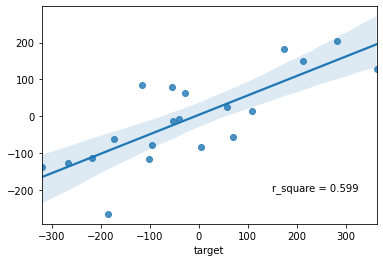

In [16]:
_ = sns.regplot(x=y_test, y=y_pred)
_ = plt.text(x=150, y=-200, s=f"r_square = {round(r2_score(y_test, y_pred), 3)}")

In [17]:
original_r2_score = r2_score(y_test, y_pred)

## Run the same regression as above but with a different noise feature added each time 
(thus seeing how adding a different feature with more or less noise effects the r2 score of the model)

In [18]:
noise_features_list = new_feat_df.drop(edit_feature, axis=1).columns.tolist()

In [19]:
all_r2_df = pd.DataFrame()
for noise_feat in noise_features_list:
    
    X = df.filter(regex="feat")
    X = pd.concat([X, new_feat_df[[noise_feat]]], axis=1)
    y = df["target"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()

    _ = model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    current_r2_df = pd.DataFrame({"added_feature": noise_feat,
                                  "noise_std": float(noise_feat[-3:]),
                                  "r2": r2_score(y_test, y_pred)}, index=[0])
    all_r2_df = pd.concat([all_r2_df, current_r2_df])

## Show an example of one of the X's to compare to the initial data frame used to get the initial r2 score shown above in the scatter plot

In [20]:
df.filter(regex="feat").head(1)

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9
0,-0.92693,-1.430141,1.632411,-3.241267,-1.247783,-1.024388,0.130741,-0.059525,-0.252568,-0.440044


In [21]:
X.head(1)

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,extra_feat_99.9
0,-0.92693,-1.430141,1.632411,-3.241267,-1.247783,-1.024388,0.130741,-0.059525,-0.252568,-0.440044,8.614412


## Plot all the r2 scores

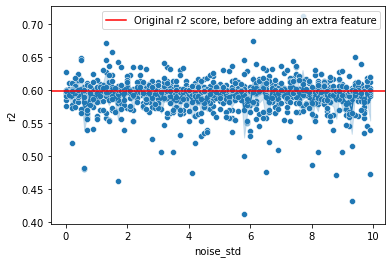

In [22]:
_ = sns.scatterplot(data=all_r2_df, x="noise_std", y="r2")
_ = sns.lineplot(data=all_r2_df, x="noise_std", y="r2")
_ = plt.axhline(y=original_r2_score, c="red", label="Original r2 score, before adding an extra feature")
_ = plt.legend()

## Initial multiple choice question:

Adding a non-important feature to a linear regression model may result in: 
1. Increase in R-square 
2. Decrease in R-square 

Answer: Only 1 is correct

## Based on the r2 vs noise_std plot it seems like the answer hinges on how one defines "non-important to the model".

#### So whilst in theory - based on the formula used to calculate the r2 score - adding an extra feature should always increase the r-squared score - hence the need for adjusted r-squareds, it actually hinges on what is considered "non-important". Hence I would suggest rewording the multiple choice question to reflect this somehow.